In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
import gillespy2

from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

Unable to use Cython optimized SSA:
Error:No module named 'cython_ssa_solver'


In [7]:
class GalactoseSwitchModel(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Galactose_Switch_Model")
            
            #parameters
            
#             km_GK = 1.2903e7 # molec
#             kf_GK = 4.0243e-4 # molec
#             kr_GK = 1.8425e3 # molec^-1 min^-1
#             kcat_GK = 3350 # min^-1
#             kdp_gal1 = 0.003851 # min^-1

            
#             Kfi = 7.45e-7 # molec^-1 min^-1
#             Kri = 890.0 # min^-1
            Kfd3i80 = gillespy2.Parameter(name='Kfd3i80', expression=0.025716) # molec^-1 min^-1
            Kdr3i80 = gillespy2.Parameter(name='Kdr3i80', expression=0.0159616) # min^-1
            self.add_parameter([Kfd3i80, Kdr3i80])
            
            kalpha1 = gillespy2.Parameter(name='kalpha1', expression=0.7379) # min^-1
            kdr_gal1 = gillespy2.Parameter(name='kdr_gal1', expression=0.02236) # min^-1
            kalpha2 = gillespy2.Parameter(name='kalpha2', expression=2.542) # min^-1
            kdr_gal2 = gillespy2.Parameter(name='kdr_gal2', expression=0.07702) # min^-1
            kalpha3 = gillespy2.Parameter(name='kalpha3', expression=0.7465) # min^-1
            kalpha3_b = gillespy2.Parameter(name='kalpha3_b', expression=0.7465*0.571429)
            kdr_gal3 = gillespy2.Parameter(name='kdr_gal3', expression=0.02666) # min^-1
            kir_gal4 = gillespy2.Parameter(name='kir_gal4', expression=0.009902) # min^-1
            kdr_gal4 = gillespy2.Parameter(name='kdr_gal4', expression=0.02476) # min^-1
            kalpha_rep = gillespy2.Parameter(name='kalpha_rep', expression=1.1440) # min^-1
            kdr_rep = gillespy2.Parameter(name='kdr_rep', expression=0.03466) # min^-1
            kalpha80 = gillespy2.Parameter(name='kalpha80', expression=0.6065) # min^-1
            kdr_gal80 = gillespy2.Parameter(name='kdr_gal80', expression=0.02888) # min^-1
            km_TR = gillespy2.Parameter(name='km_TR', expression=2.1505e7) # molec
            k_TR = gillespy2.Parameter(name='k_TR', expression=4350) # min^-1
            kr_TR = gillespy2.Parameter(name='kr_TR', expression=2.3925e3) # min^-1
            kf_TR = gillespy2.Parameter(name='kf_TR', expression=3.1353e-4) # molec^-1 min^-1
            kdp_gal2 = gillespy2.Parameter(name='kdp_gal2', expression=0.003851) # min^-1
            self.add_parameter([kalpha1, kdr_gal1, kalpha2, kdr_gal2, kalpha3, kalpha3_b, kdr_gal3, kir_gal4, kdr_gal4,
                               kalpha_rep, kdr_rep, kalpha80, kdr_gal80, km_TR, kr_TR, kf_TR, kdp_gal2])
#             kdp_gal3 = 0.01155 # min^-1
            
            # Rate constants for genes with single binding sites, proteins: G3, G80
            Kp = gillespy2.Parameter(name='Kp', expression=0.0248)
            Kq = gillespy2.Parameter(name='Kq', expression=0.1885)
            kf1 = gillespy2.Parameter(name='kf1', expression=0.1)
            kr1 = gillespy2.Parameter(name='kr1', expression=0.1/0.0248)
            kf2 = gillespy2.Parameter(name='kf2', expression=0.1)
            kr2 = gillespy2.Parameter(name='kr2', expression=0.1/0.1885)
            self.add_parameter([Kp, Kq, kf1, kr1, kf2, kr2])

#             # Rate constants for genes with 4 binding sites, proteins: G1, reporter
            Kp4 = gillespy2.Parameter(name='Kp4', expression=0.2600)
            Kq4 = gillespy2.Parameter(name='Kq4', expression=1.1721)
            kf1_4 = gillespy2.Parameter(name='kf1_4', expression=0.1)
            kf2_4 = gillespy2.Parameter(name='kf2_4', expression=0.1)
            kr1_4 = gillespy2.Parameter(name='kr1_4', expression=0.1/0.2600)
            kr2_4 = gillespy2.Parameter(name='kr2_4', expression=0.1/1.1721)
            self.add_parameter([Kp4, Kq4, kf1_4, kf2_4, kr1_4, kr2_4])
            
#             # Rate constants for genes with 5 binding sites, proteins: G2
            Kp5 = gillespy2.Parameter(name='Kp5', expression=0.0099)
            Kq5 = gillespy2.Parameter(name='Kq5', expression=0.7408)
            kf1_5 = gillespy2.Parameter(name='kf1_5', expression=0.1)
            kf2_5 = gillespy2.Parameter(name='kf2_5', expression=0.1)
            kr1_5 = gillespy2.Parameter(name='kr1_5', expression=0.1/0.0099)
            kr2_5 = gillespy2.Parameter(name='kr2_5', expression=0.1/0.7408)
            self.add_parameter([Kp5, Kq5, kf1_5, kf2_5, kr1_5, kr2_5])
            
            # The transport rate constants
            km_TR = gillespy2.Parameter(name='km_TR', expression=2.1505e7) # molec
            k_TR = gillespy2.Parameter(name='k_TR', expression=4350) # min^-1
            kr_TR = gillespy2.Parameter(name='kr_TR', expression=2.3925e3) # min^-1
            kf_TR = gillespy2.Parameter(name='kf_TR', expression=3.1353e-4) # molec^-1 min^-1
            kdp_gal2 = gillespy2.Parameter(name='kdp_gal2', expression=0.003851) # min^-1  
            self.add_parameter([km_TR, k_TR, kr_TR, kf_TR, kdp_gal2])

            # The enzymatic rate constants
            km_GK = gillespy2.Parameter(name='km_GK', expression=1.2903e7) # molec
            kf_GK = gillespy2.Parameter(name='kf_GK', expression=4.0243e-4) # molec
            kr_GK = gillespy2.Parameter(name='kr_GK', expression=1.8425e3) # molec^-1 min^-1
            kcat_GK = gillespy2.Parameter(name='kcat_GK', expression=3350) # min^-1
            self.add_parameter([km_GK, kf_GK, kr_GK, kcat_GK])
                
            # Protein decay (dilution) rate constants
            kdp_gal1 = gillespy2.Parameter(name='kdp_gal1', expression=0.003851) # min^-1
            kdp_gal2 = gillespy2.Parameter(name='kdp_gal2', expression=0.003851) # min^-1
            kdp_gal3 = gillespy2.Parameter(name='kdp_gal3', expression=0.0116) # min^-1
            kdp_gal3_deg = gillespy2.Parameter(name='kdp_gal3_deg', expression=0.0116/2)
            kdp_gal4 = gillespy2.Parameter(name='kdp_gal4', expression=0.006931) # min^-1
            kdp_gal80 = gillespy2.Parameter(name='kdp_gal80', expression=0.006931) # min^-1
            kdp_rep = gillespy2.Parameter(name='kdp_rep', expression=0.01155) # min^-1
            self.add_parameter([kdp_gal1, kdp_gal2, kdp_gal3, kdp_gal3_deg, kdp_gal4, kdp_gal80, kdp_rep])
                
            # g3 reactions that produce GAI
            Kfi = gillespy2.Parameter(name='Kfi', expression=7.45e-7) # molec^-1 min^-1
            Kri = gillespy2.Parameter(name='Kri', expression=890.0) # min^-1
            self.add_parameter([Kfi, Kri])
            
            kip_gal1 = gillespy2.Parameter(name='kip_gal1', expression=1.9254) # min^-1
            kip_gal2 = gillespy2.Parameter(name='kip_gal2', expression=13.4779) # min^-1
            kip_gal3 = gillespy2.Parameter(name='kip_gal3', expression=55.4518) # min^-1
            kip_gal4 = gillespy2.Parameter(name='kip_gal4', expression=10.7091) # min^-1
            kip_gal80 = gillespy2.Parameter(name='kip_gal80', expression=3.6737) # min^-1
            kip_rep = gillespy2.Parameter(name='kip_rep', expression=5.7762) # min^-1
            self.add_parameter([kip_gal1, kip_gal2, kip_gal3, kip_gal4, kip_gal80, kip_rep])
            
            #dimer reactions
            Kfd = gillespy2.Parameter(name='Kfd', expression=100) # molec^-1 min^-1
            Krd = gillespy2.Parameter(name='Krd', expression=0.001) # min^-1
            kdp_gal4 = gillespy2.Parameter(name='kdp_gal4', expression=0.006931) # min^-1
            kdp_gal80 = gillespy2.Parameter(name='kdp_gal80', expression=0.006931) # min^-1
            self.add_parameter([Kfd, Krd, kdp_gal4, kdp_gal80])
            
            Kf80 = gillespy2.Parameter(name='Kf80', expression=500) # min^-1
            Kr80 = gillespy2.Parameter(name='Kr80', expression=500) # min^-1
            self.add_parameter([Kf80, Kr80])
            
            #Species
            #Genes
            DG1 = gillespy2.Species(name='DG1', initial_value=0)
            DG1_G4d = gillespy2.Species(name='DG1_G4d', initial_value=0)
            DG1_G4d_G80d = gillespy2.Species(name='DG1_G4d_G80d', initial_value=1)
            DG2 = gillespy2.Species(name='DG2', initial_value=0)
            DG2_G4d = gillespy2.Species(name='DG2_G4d', initial_value=0)
            DG2_G4d_G80d = gillespy2.Species(name='DG2_G4d_G80d', initial_value=1)
            DG3 = gillespy2.Species(name='DG3', initial_value=0)
            DG3_G4d = gillespy2.Species(name='DG3_G4d', initial_value=0)
            DG3_G4d_G80d = gillespy2.Species(name='DG3_G4d_G80d', initial_value=1)
            DG80 = gillespy2.Species(name='DG80', initial_value=0)
            DG80_G4d = gillespy2.Species(name='DG80_G4d', initial_value=0)
            DG80_G4d_G80d = gillespy2.Species(name='DG80_G4d_G80d', initial_value=1)
            DGrep = gillespy2.Species(name='DGrep', initial_value=0)
            DGrep_G4d = gillespy2.Species(name='DGrep_G4d', initial_value=0)
            DGrep_G4d_G80d = gillespy2.Species(name='DGrep_G4d_G80d', initial_value=1)
            self.add_species([DG1, DG1_G4d, DG1_G4d_G80d, DG2, DG2_G4d, DG2_G4d_G80d, DG3, DG3_G4d,
                              DG3_G4d_G80d, DG80, DG80_G4d, DG80_G4d_G80d, DGrep, DGrep_G4d, DGrep_G4d_G80d])
            
            #mRNAs
            R1 = gillespy2.Species(name='R1', initial_value=1)
            R2 = gillespy2.Species(name='R2', initial_value=1)
            R3 = gillespy2.Species(name='R3', initial_value=1)
            R4 = gillespy2.Species(name='R4', initial_value=1)
            R80 = gillespy2.Species(name='R80', initial_value=1)
            reporter_rna = gillespy2.Species(name='reporter_rna', initial_value=1)
            self.add_species([R1, R2, R3, R4, R80, reporter_rna])
            
            #Proteins and Metabolites
            G1 = gillespy2.Species(name='G1', initial_value=132, deterministic=True)
            G2 = gillespy2.Species(name='G2', initial_value=1156, deterministic=True)
            G3 = gillespy2.Species(name='G3', initial_value=4341)
            G3i = gillespy2.Species(name='G3i', initial_value=0)
            G4 = gillespy2.Species(name='G4', initial_value=1)
            G4d = gillespy2.Species(name='G4d', initial_value=308)
            G80 = gillespy2.Species(name='G80', initial_value=1)
            G80C = gillespy2.Species(name='G80C', initial_value=1)
            G80d = gillespy2.Species(name='G80d', initial_value=157)
            G80Cd = gillespy2.Species(name='G80Cd', initial_value=157)
            G80G3i = gillespy2.Species(name='G80G3i', initial_value=0)
            GAI = gillespy2.Species(name='GAI', initial_value=0, deterministic=True)
            GAE = gillespy2.Species(name='GAE', initial_value=1000)
            G2GAI = gillespy2.Species(name='G2GAI', initial_value=0, deterministic=True)
            G2GAE = gillespy2.Species(name='G2GAE', initial_value=0, deterministic=True)
            G1GAI = gillespy2.Species(name='G1GAI', initial_value=0, deterministic=True)
            reporter = gillespy2.Species(name='reporter', initial_value=132)
            self.add_species([G1, G2, G3, G3i, G4, G4d, G80, G80C, G80d, 
                              G80Cd, G80G3i, GAE, GAI, G2GAI, G2GAE, G1GAI, reporter])
            
            

            #rate_rules
            # GAI
            dGAI_dt = gillespy2.RateRule(name='dGAI_dt', 
                                         expression="kr_TR*G2GAI - kf_TR*GAI*G2 + kr_GK*G1GAI - kf_GK*G1*GAI + kdp_gal1*G1GAI + kdp_gal2*G2GAI", species=GAI)
            # G2GAI
            dG2GAI_dt = gillespy2.RateRule(name='dG2GAI_dt', 
                                           expression="-k_TR*G2GAI + kf_TR*GAI*G2 - kr_TR*G2GAI + k_TR*G2GAE", species=G2GAI) # f[1] G2GAI
            # G2GAE
            dG2GAE_dt = gillespy2.RateRule(name='dG2GAE_dt', 
                                           expression="k_TR*G2GAI - k_TR*G2GAE - kr_TR*G2GAE + kf_TR*GAE*G2", species=G2GAE) # f[2] G2GAE
            # G1GAI
            dG1GAI_dt = gillespy2.RateRule(name='dG1GAI_dt', 
                                           expression="kf_GK*G1*GAI - kr_GK*G1GAI - kcat_GK*G1GAI", species=G1GAI) # f[3] G1GAI
            # G1
            dG1_dt = gillespy2.RateRule(name='dG1_dt', 
                                        expression="-kf_GK*G1*GAI + kr_GK*G1GAI + kcat_GK*G1GAI", species=G1) # f[4] G1
            # G2
            dG2_dt = gillespy2.RateRule(name='dG2_dt', 
                                        expression="-kf_TR*G2*GAE + kr_TR*G2GAE - kf_TR*G2*GAI + kr_TR*G2GAI", species=G2) # f[5] G2
            self.add_rate_rule([dGAI_dt, dG2GAI_dt, dG2GAE_dt, dG1GAI_dt, dG1_dt, dG2_dt])
            
            #reactions
            #Translation Reactions
            
            # Translation of G1
            tran_g1 = gillespy2.Reaction(name='tran_g1', reactants={R1:1}, products={G1:1, R1:1}, rate=kip_gal1)
            self.add_reaction(tran_g1)

            # Degradation of G1
            deg_g1 = gillespy2.Reaction(name='deg_g1', reactants={G1:1}, products={}, rate=kdp_gal1)
            deg_g1_b = gillespy2.Reaction(name='deg_g1_b', reactants={G1GAI:1}, products={GAI:1}, rate=kdp_gal1)
            self.add_reaction([deg_g1, deg_g1_b])
                                         
            # Translation of G2
            tran_g2 = gillespy2.Reaction(name='tran_g2', reactants={R2:1}, products={G2:1,R2:1},rate=kip_gal2)
            self.add_reaction(tran_g2)                             

            # Degradation of G2
            deg_g2 = gillespy2.Reaction(name='deg_g2', reactants={G2:1}, products={}, rate=kdp_gal2)
            deg_g2_b = gillespy2.Reaction(name='deg_g2_b', reactants={G2GAE:1}, products={}, rate=kdp_gal2)
            deg_g2_c = gillespy2.Reaction(name='deg_g2_c', reactants={G2GAI:1}, products={GAI:1}, rate=kdp_gal2)
            self.add_reaction([deg_g2, deg_g2_b, deg_g2_c])
                                         
            # Translation of G3
            trans_G3 = gillespy2.Reaction(name='trans_G3', reactants={R3:1}, products={G3:1,R3:1}, rate=kip_gal3)
            self.add_reaction(trans_G3)

            # Degradation of G3
            deg_G3 = gillespy2.Reaction(name='deg_G3', reactants={G3:1}, products={}, rate=kdp_gal3)
            deg_G3_b = gillespy2.Reaction(name='deg_G3_b', reactants={G3i:1}, products={GAI:1}, rate=kdp_gal3)
            self.add_reaction([deg_G3, deg_G3_b])

            # Translation of G4
            tran_G4 = gillespy2.Reaction(name='tran_G4', reactants={R4:1}, products={G4:1, R4:1}, rate=kip_gal4)
            self.add_reaction(tran_G4)

            # Degradation of G4
            deg_G4 = gillespy2.Reaction(name='deg_G4', reactants={G4:1}, products={}, rate=kdp_gal4)
            self.add_reaction(deg_G4)
                                         
            # Translation of reporter
            tran_reporter = gillespy2.Reaction(name='tran_reporter', reactants={reporter_rna:1}, 
                                               products={reporter:1,reporter_rna:1}, rate=kip_rep)
            self.add_reaction(tran_reporter)

            # Degradation of reporter
            deg_reporter = gillespy2.Reaction(name='deg_reporter', reactants={reporter:1}, products = {}, rate=kdp_rep)
            self.add_reaction(deg_reporter)

            # Translation of G80
            tran_G80 = gillespy2.Reaction(name='tran_G80', reactants={R80:1}, products={G80:1, R80:1}, rate=kip_gal80)
            self.add_reaction(tran_G80)
            # Degradation of G80
            deg_G80 = gillespy2.Reaction(name='deg_G80', reactants={G80:1}, products={}, rate=kdp_gal80)
            self.add_reaction(deg_G80)
            
            #Dimer Reactions

            # G4 + G4 -> G4d (Dimerization of G4)
            dim_G4 = gillespy2.Reaction(name='dim_G4', reactants={G4:2}, products={G4d:1}, rate=Kfd)
            self.add_reaction(dim_G4)
            # G4d -> G4 + G4 (Unbinding of G4 molecules)
            unbind_G4 = gillespy2.Reaction(name='unbind_G4', reactants={G4d:1}, products={G4:2}, rate=Krd)
            self.add_reaction(unbind_G4)
            # G4d -> Null (Degradation of G4d)
            deg_G4d = gillespy2.Reaction(name='deg_G4d', reactants={G4d:1}, products={}, rate=kdp_gal4)
            self.add_reaction(deg_G4d)
            # G80 + G80 -> G80d (Dimerization of G80)
            dim_G80 = gillespy2.Reaction(name='dim_G80', reactants={G80:2}, products={G80d:1}, rate=Kfd)
            self.add_reaction(dim_G80)
            # G80d -> G80 + G80 (Unbinding of G80 molecules)
            unbind_G80 = gillespy2.Reaction(name='unbind_G80', reactants={G80d:1}, products={G80:2}, rate=Krd)
            self.add_reaction(unbind_G80)
            # G80d -> Null (Degradation of G80d)
            deg_G80d = gillespy2.Reaction(name='deg_G80d', reactants={G80d:1}, products={}, rate=kdp_gal80)
            self.add_reaction(deg_G80d)
            # G80C + G80C -> G80Cd (Dimerization of G80 in the cytoplasm)
            dim_G80C = gillespy2.Reaction(name='dim_G80C', reactants={G80C:2}, products={G80Cd:1}, rate=Kfd)
            self.add_reaction(dim_G80C)
            # G80Cd -> G80C + G80C
            unbind_G80C = gillespy2.Reaction(name='unbind_G80C', reactants={G80Cd:1}, products={G80C:2}, rate=Krd)
            self.add_reaction(unbind_G80C)
            # G80Cd -> Null (Degradation of G80Cd)
            deg_G80Cd = gillespy2.Reaction(name='deg_G80Cd', reactants={G80Cd:1}, products={}, rate=kdp_gal80)
            self.add_reaction(deg_G80Cd)
            
            #Enzymatic Reactions

            # G1 + GAI -> G1GAI
            to_G1GAI = gillespy2.Reaction(name='to_G1GAI', reactants={G1:1, GAI:1}, products={G1GAI:1}, rate=kf_GK)
            self.add_reaction(to_G1GAI)
            # G1GAI -> G1 + GAI
            from_G1GAI = gillespy2.Reaction(name='from_G1GAI', reactants={G1GAI:1}, products={G1:1, GAI:1}, rate=kr_GK)
            self.add_reaction(from_G1GAI)
            # G1GAI -> G1 (galactokinase metabolizes GAI)
            metab_GAI = gillespy2.Reaction(name='metab_GAI', reactants={G1GAI:1}, products={G1:1}, rate=kcat_GK)
            self.add_reaction(metab_GAI)
            # G1GAI -> GAI (Degradation of G1 bound to internal galactose)
            deg_G1GAI = gillespy2.Reaction(name='deg_G1GAI', reactants={G1GAI:1}, products={}, rate=kdp_gal1)
            self.add_reaction(deg_G1GAI)
            
            #G3 reactions

            # Note that since we're defining a GAI species in the CME representation and updating it
            # in the hook, we don't need to modify the reaction rate.
            G3i_to_G3 = gillespy2.Reaction(name='G3i_to_G3', reactants={G3i:1}, products={G3:1, GAI:1}, rate=Kri)
            G3_to_G3i = gillespy2.Reaction(name='G3_to_G3i', reactants={GAI:1, G3:1}, products={G3i:1}, rate=Kfi)
            self.add_reaction([G3i_to_G3, G3_to_G3i])
            # G80Cd + G3i -> G80G3i (Sequestration of G80Cd in the cytoplasm)
            seq_G80Cd = gillespy2.Reaction(name='seq_G80Cd', reactants={G80Cd:1, G3i:1}, products={G80G3i:1}, rate=Kfd3i80)
            self.add_reaction(seq_G80Cd)
            # G80G3i -> G3i + G80Cd (Unbinding of G80 from G3i)
            unbind_G80_G3i = gillespy2.Reaction(name='unbind_G80_G3i', reactants={G80G3i:1}, products={G80Cd:1, G3i:1}, rate=Kdr3i80)
            self.add_reaction(unbind_G80_G3i)
            # This reaction may be incorrect in ODE Model
            # Maybe should be:
            # G80G3i -> G80 + GAI (G3 degradation while in G80G3i form)
            # Implemented as:
            # G80G3i -> Null (G3 degradation while in G80G3i form)
            deg_G80G3i = gillespy2.Reaction(name='deg_G80G3i', reactants={G80G3i:1}, products={}, rate=kdp_gal3_deg)
            self.add_reaction(deg_G80G3i)

            #G80 Transport

            # G80Cd -> G80d (Transport of G80 from the cytoplasm into the nucleus)
            G80_to_nuc = gillespy2.Reaction(name='G80_to_nuc', reactants={G80Cd:1}, products={G80d:1}, rate=Kf80)
            self.add_reaction(G80_to_nuc)
            # G80d -> G80Cd (Transport of G80 from the nucleus into the cytoplasm)
            G80_to_cyto = gillespy2.Reaction(name='G80_to_cyto', reactants={G80d:1}, products={G80Cd:1}, rate=Kr80)
            self.add_reaction(G80_to_cyto)
            
            #Transcription Reactions
            
            # Transcription to form R1
            
            form_R1 = gillespy2.Reaction(name='form_R1', reactants={DG1_G4d:1}, products={R1:1, DG1_G4d:1}, rate=kalpha1)
            self.add_reaction(form_R1)
            # Degradation of R1
            
            deg_R1 = gillespy2.Reaction(name='deg_R1', reactants={R1:1}, products={}, rate=kdr_gal1)
            self.add_reaction(deg_R1)
            # Transcription to form R2 
            
            form_R2 = gillespy2.Reaction(name='form_R2', reactants={DG2_G4d:1}, products={R2:1, DG2_G4d:1}, rate=kalpha2)
            self.add_reaction(form_R2)
            # Degradation of R2
            
            deg_R2 = gillespy2.Reaction(name='deg_R2', reactants={R2:1}, products={}, rate=kdr_gal2)
            self.add_reaction(deg_R2)
            # Transcription to from R3
            
            form_R3 = gillespy2.Reaction(name='form_R3', reactants={DG3_G4d:1}, products={R3:1, DG3_G4d:1}, rate=kalpha3_b)
            self.add_reaction(form_R3)
            # Degradation of R3
            
            deg_R3 = gillespy2.Reaction(name='deg_R3', reactants={R3:1}, products={}, rate=kdr_gal3)
            self.add_reaction(deg_R3)
            # Transcription of R4
            # R4 is constituitively expressed in this model
            
            form_R4 = gillespy2.Reaction(name='form_R4', reactants={}, products={R4:1}, rate=kir_gal4)
            self.add_reaction(form_R4)
            # Degradation of R4
            
            deg_R4 = gillespy2.Reaction(name='deg_R4', reactants={R4:1}, products={}, rate=kdr_gal4)
            self.add_reaction(deg_R4)
            # Transcription of reporter
            
            form_reporter = gillespy2.Reaction(name='form_reporter', reactants={DGrep_G4d:1}, products={reporter_rna:1, DGrep_G4d:1}, rate=kalpha_rep)
            self.add_reaction(form_reporter)
            # Degradation of reporter
            
            deg_reporter = gillespy2.Reaction(name='deg_reporter', reactants={reporter_rna:1}, products={}, rate=kdr_rep)
            self.add_reaction(deg_reporter)
            # Transcription of R80
            
            form_R80 = gillespy2.Reaction(name='form_R80', reactants={DG80_G4d:1}, products={R80:1, DG80_G4d:1}, rate=kalpha80)
            self.add_reaction(form_R80)
            # Degradation of R80
            
            deg_R80 = gillespy2.Reaction(name='deg_R80', reactants={R80:1}, products={}, rate=kdr_gal80)
            self.add_reaction(deg_R80)
            
            #Transport Reactions
            
            

            # G2GAI -> G2GAE
            G2GAI_to_G2GAE = gillespy2.Reaction(name='G2GAI_to_G2GAE', reactants={G2GAI:1}, products={G2GAE:1}, rate=k_TR)
            self.add_reaction(G2GAI_to_G2GAE)
            # G2GAE -> G2GAI
            G2GAE_to_G2GAI = gillespy2.Reaction(name='G2GAE_to_G2GAI', reactants={G2GAE:1}, products={G2GAI:1}, rate=k_TR)
            self.add_reaction(G2GAE_to_G2GAI)
            # G2GAE -> G2 + GAE
            G2GAE_to_G2_GAE = gillespy2.Reaction(name='G2GAE_to_G2_GAE', reactants={G2GAE:1}, products={G2:1}, rate=kr_TR)
            self.add_reaction(G2GAE_to_G2_GAE)
            # GAE is a constant now doesn't need to be in any reactions
            # G2 + GAE -> G2GAE
            
            #SHOULD I REMOVE GAE?????
            G2_GAE_to_G2GAE = gillespy2.Reaction(name='G2_GAE_to_G2GAE', reactants={G2:1}, products={G2GAE:1}, propensity_function='kf_TR*GAE')
            self.add_reaction(G2_GAE_to_G2GAE)
            # G2GAE -> Null (Degradation of G2 bound to external galactose)
            deg_G2GAE = gillespy2.Reaction(name='deg_G2GAE', reactants={G2GAE:1}, products={}, rate=kdp_gal2)
            self.add_reaction(deg_G2GAE)
            # G2 + GAI -> G2GAI
            G2_GAI_to_G2GAI = gillespy2.Reaction(name='G2_GAI_to_G2GAI', reactants={G2:1}, products={G2GAI:1}, rate=kf_TR)
            self.add_reaction(G2_GAI_to_G2GAI)
            # G2GAI -> G2 + GAI
            G2GAI_to_G2_GAI = gillespy2.Reaction(name='G2GAI_to_G2_GAI', reactants={G2GAI:1}, products={G2:1}, rate=kr_TR)
            self.add_reaction(G2GAI_to_G2_GAI)
            # G2GAI -> GAI (Degradation of G2 bound to internal galactose)
            deg_G2GAI = gillespy2.Reaction(name='deg_G2GAI', reactants={G2GAI:1}, products={}, rate=kdp_gal2)
            self.add_reaction(deg_G2GAI)
            
            #DNA Promoter Reactions 
            
            """ Reactions for DG1 """
            # DG1 + G4d -> DG1_G4d (G1 DNA-promoter binding)
            G1_bind = gillespy2.Reaction(name='G1_bind', reactants={DG1:1, G4d:1}, products={DG1_G4d:1}, rate=kf1_4)
            self.add_reaction(G1_bind)
            # DG1_G4d -> G4d + DG1 (G1 DNA-promoter unbinding)
            G1_unbind = gillespy2.Reaction(name='G1_unbind', reactants={DG1_G4d:1}, products={DG1:1, G4d:1}, rate=kr1_4)
            self.add_reaction(G1_unbind)
            # DG1_G4d + G80d -> DG1_G4d_G80d (binding with the repressor)
            G1_bind_repressor = gillespy2.Reaction(name='G1_bind_repressor', reactants={DG1_G4d:1, G80d:1}, products={DG1_G4d_G80d:1}, rate=kf2_4)
            self.add_reaction(G1_bind_repressor)
            # DG1_G4d_G80d -> DG1_G4d + G80d (unbinding of the repressor)
            G1_unbind_repressor = gillespy2.Reaction(name='G1_unbind_repressor', reactants={DG1_G4d_G80d:1}, products={DG1_G4d:1, G80d:1}, rate=kr2_4)
            self.add_reaction(G1_unbind_repressor)

            """ Reactions for DG2 """
            # DG2 + G4d -> DG2_G4d (DG2 DNA-promoter binding)
            G2_bind = gillespy2.Reaction(name='G2_bind', reactants={DG2:1, G4d:1}, products={DG2_G4d:1}, rate=kf1_5)
            self.add_reaction(G2_bind)
            # DG2_G4d -> G4d + DG2 (G2 DNA-promoter unbinding)
            G2_unbind = gillespy2.Reaction(name='G2_unbind', reactants={DG2_G4d:1}, products={DG2:1, G4d:1}, rate=kr1_5)
            self.add_reaction(G2_unbind)
            # DG2_G4d + G80d -> DG2_G4d_G80d (binding with the repressor)
            G2_bind_repressor = gillespy2.Reaction(name='G2_bind_repressor', reactants={DG2_G4d:1, G80d:1}, products={DG2_G4d_G80d:1}, rate=kf2_5)
            self.add_reaction(G2_bind_repressor)
            # DG2_G4d_G80d -> DG2_G4d + G80d (unbinding of the repressor)
            G2_unbind_repressor = gillespy2.Reaction(name='G2_unbind_repressor', reactants={DG2_G4d_G80d:1}, products={DG2_G4d:1, G80d:1}, rate=kr2_5)
            self.add_reaction(G2_unbind_repressor)

            """ Reactions for DG3 """
            # DG3 + G4d -> DG3_G4d DG3 DNA-promoter binding)
            DG3_bind = gillespy2.Reaction(name='DG3_bind', reactants={DG3:1, G4d:1}, products={DG3_G4d:1}, rate=kf1)
            self.add_reaction(DG3_bind)
            # DG3_G4d -> G4d + DG3 (G3 DNA-promoter unbinding)
            DG3_unbind = gillespy2.Reaction(name='DG3_unbind', reactants={DG3_G4d:1}, products={DG3:1, G4d:1}, rate=kr1)
            self.add_reaction(DG3_unbind)
            # DG3_G4d + G80d -> DG3_G4d_G80d (binding with the repressor)
            DG3_bind_repressor = gillespy2.Reaction(name='DG3_bind_repressor', reactants={DG3_G4d:1, G80d:1}, products={DG3_G4d_G80d:1}, rate=kf2)
            self.add_reaction(DG3_bind_repressor)
            # DG3_G4d_G80d -> DG3_G4d + G80d (unbinding of the repressor)
            DG3_unbind_repressor = gillespy2.Reaction(name='DG3_unbind_repressor', reactants={DG3_G4d_G80d:1}, products={DG3_G4d:1, G80d:1}, rate=kr2)
            self.add_reaction(DG3_unbind_repressor)
            """ Reactions for DGrep """
            # DGrep + G4d -> DGrep_G4d DGrep DNA-promoter binding)
            DGrep_bind = gillespy2.Reaction(name='DGrep_bind', reactants={DGrep:1, G4d:1}, products={DGrep_G4d:1}, rate=kf1_4)
            self.add_reaction(DGrep_bind)
            # DGrep_G4d -> G4d + DGrep (G1 DNA-promoter unbinding)
            DGrep_unbind = gillespy2.Reaction(name='DGrep_unbind', reactants={DGrep_G4d:1}, products={DGrep:1, G4d:1}, rate=kr1_4)
            self.add_reaction(DGrep_unbind)
            # DGrep_G4d + G80d -> DGrep_G4d_G80d (binding with the repressor)
            DGrep_bind_repressor = gillespy2.Reaction(name='DGrep_bind_repressor', reactants={DGrep_G4d:1, G80d:1}, products={DGrep_G4d_G80d:1}, rate=kf2_4)
            self.add_reaction(DGrep_bind_repressor)
            # DGrep_G4d_G80d -> DGrep_G4d + G80d (unbinding of the repressor)
            DGrep_unbind_repressor = gillespy2.Reaction(name='DGrep_unbind_repressor', reactants={DGrep_G4d_G80d:1}, products={DGrep_G4d:1, G80d:1}, rate=kr2_4)
            self.add_reaction(DGrep_unbind_repressor)
            
            """ Reactions for DG80 """
            # DG80 + G4d -> DG80_G4d DG80 DNA-promoter binding)
            D80_bind = gillespy2.Reaction(name='D80_bind', reactants={DG80:1, G4d:1}, products={DG80_G4d:1}, rate=kf1)
            self.add_reaction(D80_bind)
            # DG80_G4d -> G4d + DG80 (G1 DNA-promoter unbinding)
            D80_unbind = gillespy2.Reaction(name='D80_unbind', reactants={DG80_G4d:1}, products={DG80:1, G4d:1}, rate=kr1)
            self.add_reaction(D80_unbind)
            # DG80_G4d + G80d -> DG80_G4d_G80d (binding with the repressor)
            D80_bind_repressor = gillespy2.Reaction(name='D80_bind_repressor', reactants={DG80_G4d:1, G80d:1}, products={DG80_G4d_G80d:1}, rate=kf2)
            self.add_reaction(D80_bind_repressor)
            # DG80_G4d_G80d -> DG80_G4d + G80d (unbinding of the repressor)
            D80_unbind_repressor = gillespy2.Reaction(name='D80_unbind_repressor', reactants={DG80_G4d_G80d:1}, products={DG80_G4d:1, G80d:1}, rate=kr2)
            self.add_reaction(D80_unbind_repressor)
            
            self.timespan(numpy.linspace(0, 10, 501))

In [8]:
model = GalactoseSwitchModel()

In [9]:
%time results = model.run(solver=BasicTauHybridSolver(), debug=False)

Wall time: 1h 12min 33s


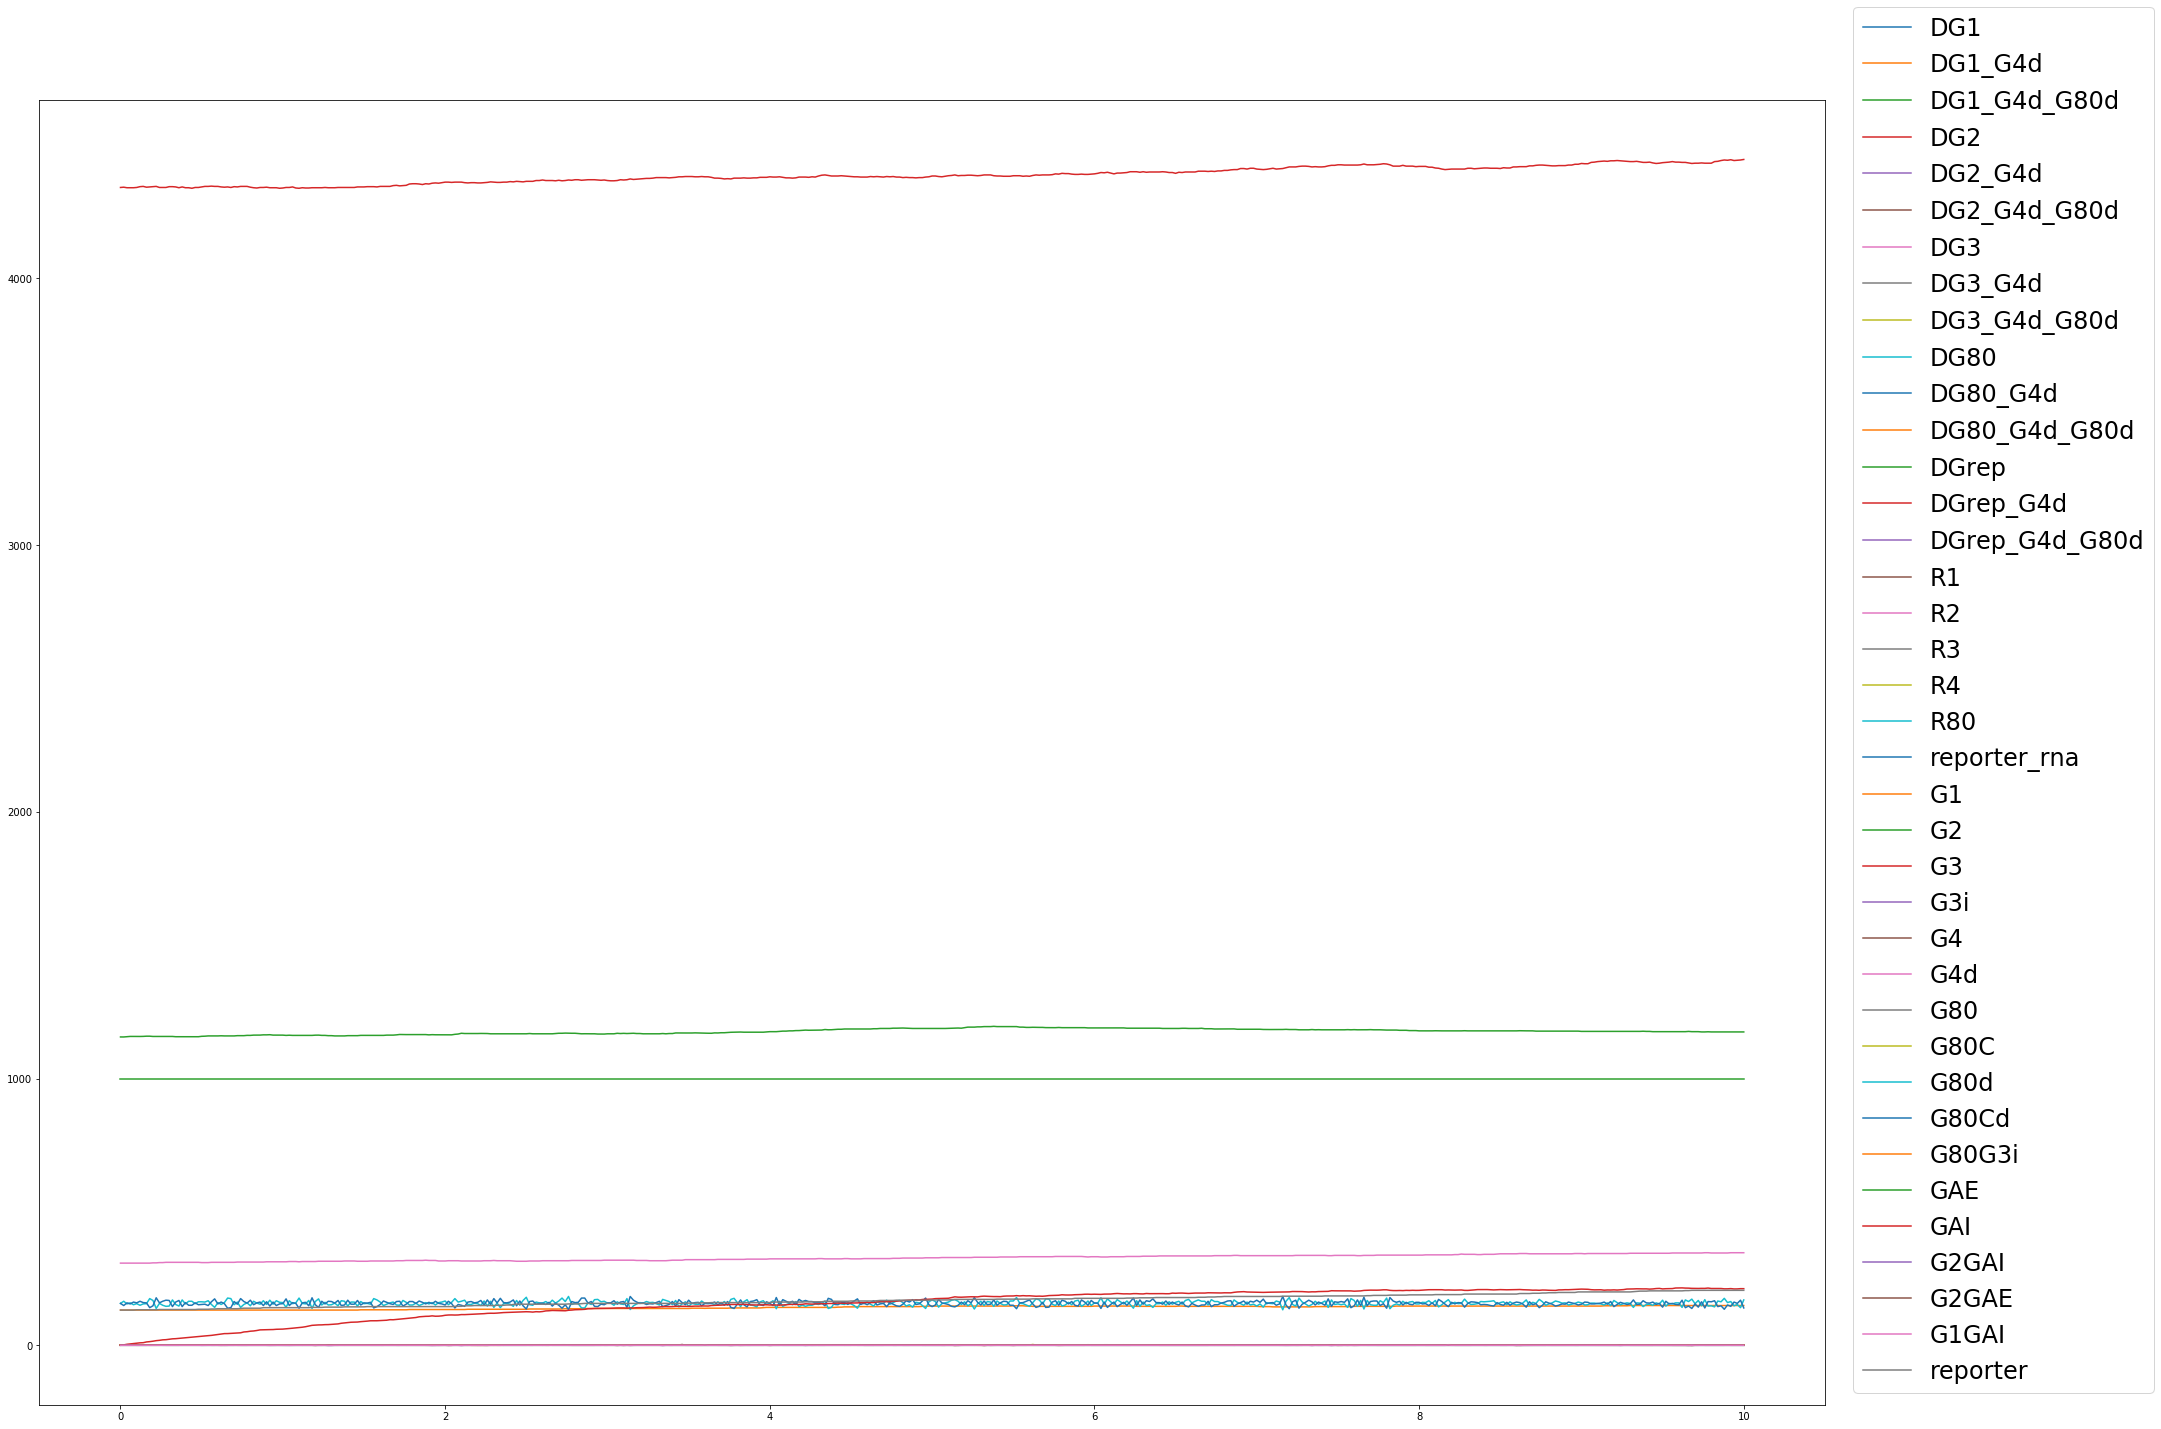

In [10]:
plt.figure(figsize=(32, 24))
for s in model.listOfSpecies:
    plt.plot(results['time'], results[s], label=s)
plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0), prop={'size': 24})